# OLMo-3.1-32B-Think safety boost

In [1]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_file_path = "../safety-eval/generation_results/"
model_name = "allenai/Olmo-3.1-32B-Think"

safety_benchmark_configs = [
    ('wildjailbreak::harmful_wildguard_reasoning_answer', 'inverted_macro_asr'),
    ('do_anything_now::wildguard_reasoning_answer', 'inverted_macro_asr'),
    ('wmdp::default_reasoning_answer', 'inverted_accuracy')
]
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]

# quick helper function to retrieve values
def retrieve_results(
    results_json_path: str,
    benchmark_configs: list[tuple[str, str]],
    compute_mean: bool = True,
    ):
    """
    Given a string filepath to a JSON file containing results created by safety-eval, and tuples of benchmarks and requested metrics, returns results as list and optionally the mean at the end.

        Args:
            results_json_path (`str`):
                Filepath of safety-eval generated JSON results file.
            benchmark_configs (`list[tuple[str, str]]`):
                List of tuples, each containing a benchmark and associated metric name. 
            compute_mean (`bool`, defaults to `False`):
                Whether or not to append average score at the end.

        Returns:
            Safety benchmark results as a list
    """
    with open(results_json_path) as fp:
        results_dict = json.load(fp)

    scores = []
    for benchmark, score_name in benchmark_configs:
        scores.append(results_dict[benchmark][score_name])
    
    if compute_mean:
        mean = sum(scores) / len(scores)
        scores.append(mean)
        print(f"Average score for {results_json_path} is {mean}")
    return scores

### do it for base
base_path = root_file_path + "allenai/Olmo-3-32B-Think" + "/RL/metrics_RL_main.json"
base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
    
max_digits = 4
ckpt_values = []
stop = 2550 #2350
for i in range(50,stop,50):
    ckpt_id = str(i)
    num_zeroes = max_digits - len(ckpt_id)
    ckpt_id_formatted = "step_" + "0" * num_zeroes + ckpt_id
    eval_report_path = root_file_path + model_name + "/RL/metrics_RL_" + ckpt_id_formatted + ".json"
    # print(eval_report_path)
    try:
        ckpt_values += [retrieve_results(results_json_path=eval_report_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)]
        print(f"Found report in path {eval_report_path}")
    except:
        pass
    
print(ckpt_values)
n = 1 + ckpt_values

df = pd.DataFrame({
    'Benchmark': benchmarks * n,
    'Value': base_values + ckpt_values,
    'Model': ['base'] * len(benchmarks) + ['EMA eta: 0.25 (v00.28)'] * len(benchmarks) + ['EMA eta: 0.4 (v00.29)'] * len(benchmarks) + ['EMA eta: 0.75 (v00.30)'] * len(benchmarks)
})

fig, ax = plt.subplots(figsize=(14, 6))
palette = sns.color_palette("viridis", n)
bars = sns.barplot(data=df, x='Benchmark', y='Value', hue='Model', ax=ax, palette=palette)

# again we add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Score (higher is better)', fontsize=12)
ax.set_title('Safety Benchmark Results\n(reporting checkpoint with strongest math performance)', fontsize=14, fontweight='bold')
ax.legend(title='Model', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 1 * 1.07) # trying to give room for labels
plt.tight_layout()
plt.show()

Average score for ../safety-eval/generation_results/allenai/Olmo-3-32B-Think/RL/metrics_RL_main.json is 0.4512172267635483
Average score for ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0050.json is 0.35266363911595516
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0050.json
Average score for ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0100.json is 0.38456736300333033
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0100.json
Average score for ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0150.json is 0.37995110505600965
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0150.json
Average score for ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_2500.json is 0.5303333333333333
Found report in path 

TypeError: unsupported operand type(s) for +: 'int' and 'list'

Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0050.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0100.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0150.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0200.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0250.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_0500.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_1000.json
Found report in path ../safety-eval/generation_results/allenai/Olmo-3.1-32B-Think/RL/metrics_RL_step_2500.json

Found 8 checkpoints: [50, 100, 150, 200, 250, 500, 1000, 2500]


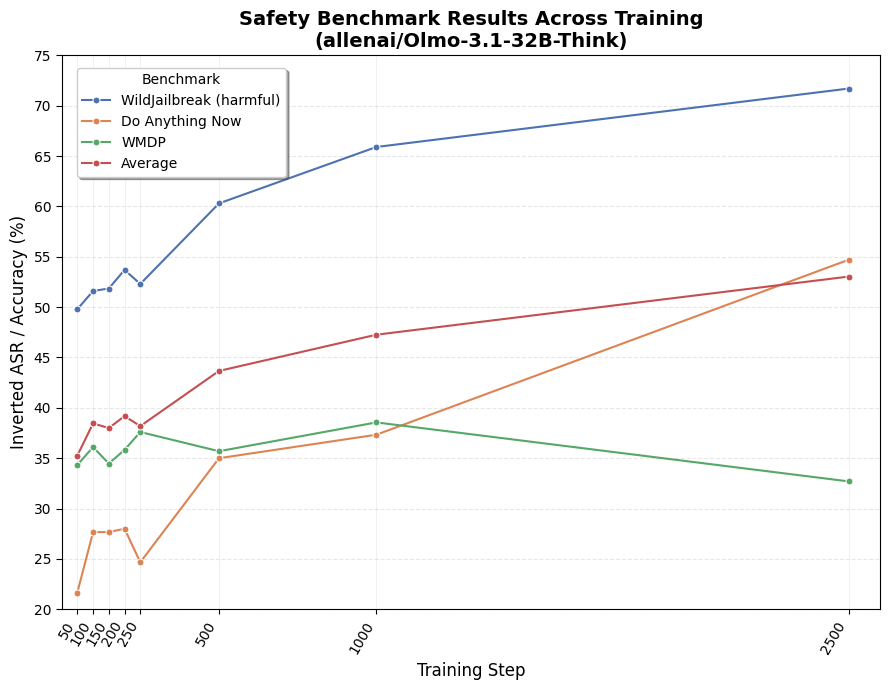

In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

root_file_path = "../safety-eval/generation_results/"
model_name = "allenai/Olmo-3.1-32B-Think"
include_base_model = False
x_min = 0

safety_benchmark_configs = [
    ('wildjailbreak::harmful_wildguard_reasoning_answer', 'inverted_macro_asr'),
    ('do_anything_now::wildguard_reasoning_answer', 'inverted_macro_asr'),
    ('wmdp::default_reasoning_answer', 'inverted_accuracy')
]

benchmark_display_names = {
    'wildjailbreak::harmful_wildguard_reasoning_answer': 'WildJailbreak (harmful)',
    'do_anything_now::wildguard_reasoning_answer': 'Do Anything Now',
    'wmdp::default_reasoning_answer': 'WMDP',
}
benchmarks = [benchmark[0] for benchmark in safety_benchmark_configs] + ["Average"]
display_names = [benchmark_display_names.get(b, b) for b in benchmarks]

def retrieve_results(
    results_json_path: str,
    benchmark_configs: list[tuple[str, str]],
    compute_mean: bool = True,
):
    with open(results_json_path) as fp:
        results_dict = json.load(fp)

    scores = []
    for benchmark, score_name in benchmark_configs:
        scores.append(results_dict[benchmark][score_name])
    
    if compute_mean:
        mean = sum(scores) / len(scores)
        scores.append(mean)
    return scores

steps_found = []
all_values = []

if include_base_model:
    base_path = root_file_path + "allenai/Olmo-3-32B-Think" + "/RL/metrics_RL_main.json"
    base_values = retrieve_results(results_json_path=base_path, benchmark_configs=safety_benchmark_configs, compute_mean=True)
    print(f"Found report in path {base_path}")
    steps_found.append(0)
    all_values.append(base_values)

max_digits = 4
stop = 2550
for i in range(50, stop, 50):
    ckpt_id = str(i)
    num_zeroes = max_digits - len(ckpt_id)
    ckpt_id_formatted = "step_" + "0" * num_zeroes + ckpt_id
    eval_report_path = root_file_path + model_name + "/RL/metrics_RL_" + ckpt_id_formatted + ".json"
    try:
        all_values.append(retrieve_results(results_json_path=eval_report_path, benchmark_configs=safety_benchmark_configs, compute_mean=True))
        steps_found.append(i)
        print(f"Found report in path {eval_report_path}")
    except:
        pass

print(f"\nFound {len(steps_found)} checkpoints: {steps_found}")

data = []
for step_idx, step in enumerate(steps_found):
    for bench_idx, benchmark in enumerate(display_names):
        data.append({
            'Step': step,
            'Benchmark': benchmark,
            'Score': all_values[step_idx][bench_idx] * 100  # Multiply by 100
        })

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(9, 7))
### Changed palette for better color distinction between lines
palette = ["#4C72B0", "#DD8452", "#55A868", "#C44E52"]
sns.lineplot(
    data=df, x='Step', y='Score', hue='Benchmark', 
    ax=ax, palette=palette, marker='o', markersize=5, linewidth=1.5
)
for step in steps_found:
    ax.axvline(x=step, color='gray', alpha=0.15, linestyle='-', linewidth=0.5)

ax.set_xlabel('Training Step', fontsize=12)
### Changed y-axis label to be more specific
ax.set_ylabel('Inverted ASR / Accuracy (%)', fontsize=12)
ax.set_title(f'Safety Benchmark Results Across Training\n({model_name})', fontsize=14, fontweight='bold')
### Moved legend outside plot area to avoid overlap with data
ax.legend(title='Benchmark', frameon=True, fancybox=True, shadow=True, 
          loc='upper left', bbox_to_anchor=(0.01, 0.99))
ax.grid(axis='y', alpha=0.3, linestyle='--', which= 'both')
ax.set_ylim(20, 75)  # Updated for scaled values
ax.set_xlim(x_min, 2600)

# Y-axis ticks at intervals of 5
ax.yaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='y', which='both', length=4)

# X-axis: show a reasonable subset of ticks to avoid crowding
if len(steps_found) > 15:
    tick_step = max(1, len(steps_found) // 10)
    tick_positions = steps_found[::tick_step]
    if steps_found[-1] not in tick_positions:
        tick_positions.append(steps_found[-1])
else:
    tick_positions = steps_found

ax.set_xticks(tick_positions)
ax.set_xticklabels([f'{s}' for s in tick_positions], rotation=60, ha='right')

plt.tight_layout()
plt.show()